## Importando libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from sklearn.metrics import r2_score #verificar o erro entre a predição e o valor real
from sklearn.neural_network import MLPRegressor
import datetime as dt

### Pegando o Dataset

In [2]:
dataset = pd.read_csv("./ibov_2017_2023.csv")

### Removando colunas não usadas

In [3]:
dataset = dataset.drop('Vol.', axis=1)
dataset = dataset.drop('Data', axis=1)
dataset = dataset.drop('Var%', axis=1)

### Criando uma nova coluna com o o valor do dia Posterior

In [5]:
dataset[['Último_amanha']] = dataset[['Último']].shift(-1)

### Criando uma Coluna de retorno do fechamento e o fechamento do dia posterior

In [6]:
dataset['Retorno'] = dataset['Último_amanha'] - dataset['Último']

### Normalizando colunas para esté entre 0 e 1

In [7]:
escala = StandardScaler()
for c in dataset.columns:
    dataset[c+'_Norm'] = escala.fit_transform(dataset[c].to_numpy().reshape(-1, 1))
dataset = dataset.dropna()

### Dividindo o dataset entre dados de treinamento e teste

In [10]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(dataset[['Último_Norm']], dataset[['Último_amanha_Norm']], test_size=0.3)

### Criando o objeto do modelo

In [11]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                   max_iter=2000,
                   tol=0.00000001,
                   learning_rate_init=0.1,
                   solver="sgd",
                   activation="logistic",
                   learning_rate="constant",
                   verbose=2)

### Fazendo o treinamento do modelo entre o que eu vou treinar e o que eu vou prever

In [12]:
rna.fit(X_norm_train, Y_train)

/home/wesley/dev/projetos/tcc/multilayer_perceptron/ibov_close_date/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.50172509
Iteration 2, loss = 0.47852092
Iteration 3, loss = 0.45780478
Iteration 4, loss = 0.42702211
Iteration 5, loss = 0.37737507
Iteration 6, loss = 0.30075259
Iteration 7, loss = 0.19149282
Iteration 8, loss = 0.07963267
Iteration 9, loss = 0.02352496
Iteration 10, loss = 0.02281221
Iteration 11, loss = 0.02391847
Iteration 12, loss = 0.01615749
Iteration 13, loss = 0.01253184
Iteration 14, loss = 0.01183539
Iteration 15, loss = 0.01111165
Iteration 16, loss = 0.01028465
Iteration 17, loss = 0.00966189
Iteration 18, loss = 0.00934464
Iteration 19, loss = 0.00899908
Iteration 20, loss = 0.00874742
Iteration 21, loss = 0.00846206
Iteration 22, loss = 0.00825269
Iteration 23, loss = 0.00805636
Iteration 24, loss = 0.00789488
Iteration 25, loss = 0.00772455
Iteration 26, loss = 0.00759337
Iteration 27, loss = 0.00746844
Iteration 28, loss = 0.00736537
Iteration 29, loss = 0.00739108
Iteration 30, loss = 0.00716268
Iteration 31, loss = 0.00707878
Iteration 32, los

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-08,
             verbose=2)

### Pegando a previsão feita pelo modelo

In [13]:
Y_rna_previsao = rna.predict(X_norm_test)

### Cálculo de verificação de acerto

In [14]:
r2_rna = r2_score(Y_test, Y_rna_previsao)

print("R2 RNA:", r2_rna)

R2 RNA: 0.9912238347956793


In [15]:
X_test = escala.inverse_transform(X_norm_test)

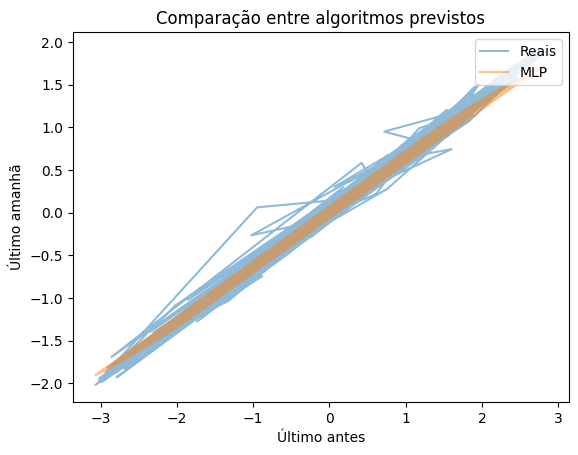

In [16]:
plt.plot(X_test, Y_test, alpha=0.5, label="Reais")
plt.plot(X_test, Y_rna_previsao, alpha=0.5, label="MLP")
plt.xlabel("Último antes")
plt.ylabel("Último amanhã")
plt.title("Comparação entre algoritmos previstos")
plt.legend(loc=1)